## Project Analisis Data: Bike Sharing Dataset
- **Nama**          : Ziyad Muhammad Adzin Azzufari
- **Email**         : ziyad.azzufari@gmail.com
- **ID Dicoding**   : ziyad_azzufari

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana distribusi jumlah penyewaan sepeda per hari (daily) dibandingkan dengan penyewaan sepeda per jam (hourly)? Apakah ada pola yang menunjukkan perbedaan signifikan antara keduanya?
- Pertanyaan 2: Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur? Kapan penyewaan sepeda cenderung lebih tinggi?
- Pertanyaan 3: Bagaimana distribusi penyewaan sepeda antara pengguna kasual dan terdaftar? Apakah pengguna terdaftar lebih banyak menyewa sepeda dibandingkan pengguna kasual?
- Pertanyaan 4: Apakah ada perbedaan dalam tren penyewaan sepeda bulanan antara tahun 2011 dan 2012? Bulan mana yang menunjukkan penyewaan terbanyak dan apakah ada pola musiman?
- Pertanyaan 5: Hari apa yang menunjukkan jumlah penyewaan sepeda tertinggi dalam seminggu? Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

import data day.csv

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


import data hour.csv

In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- day_df memberikan data harian, sementara hour_df memberikan data per jam, memungkinkan analisis yang lebih granular.
- jumlah data pada hour.csv yaitu 17379 record sedangkan pada day.csv berjumlah 731 record

### Assessing Data

Menampilkan info dataset

In [6]:
print("Informasi Dataset Day:")
day_df.info()

Informasi Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Informasi pada setiap kolom pada dataset day.csv tidak terdapat nilai yang hilang dari tiap kolom. tetapi pada dteday tipe data berupa object bukan sebagai datetime.

In [7]:
print("Informasi Dataset Hour:")
hour_df.info()

Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Informasi pada setiap kolom pada dataset hour.csv tidak terdapat nilai yang hilang dari tiap kolom. tetapi pada dteday tipe data berupa object bukan sebagai datetime.

Deskripsi data

**Insight:**
- Tidak ada nilai hilang pada tiap dataframe (hour_df dan day_df)
- Mengganti tipe data dari kolom dteday dari tiap dataframe menjadi datetime

### Cleaning Data

Mengonversi kolom tanggal ke format datetime

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Statistik Descriptive

In [8]:
print("Statistik Deskriptif Dataset Day:")
day_df.describe()

Statistik Deskriptif Dataset Day:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
print("Statistik Deskriptif Dataset Hour:")
hour_df.describe()

Statistik Deskriptif Dataset Hour:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
important_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
print("Statistik deskriptif fitur penting (Day):")
day_df[important_columns].describe()

Statistik deskriptif fitur penting (Day):


,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


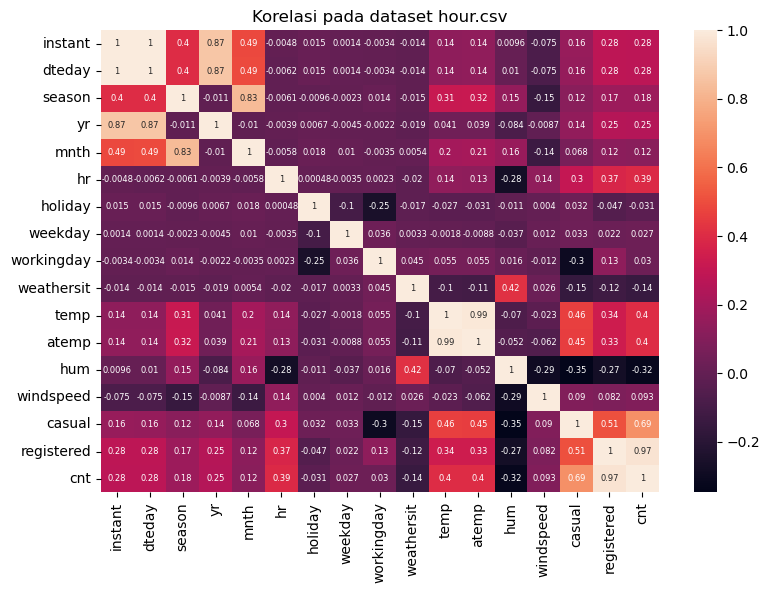

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(hour_df.corr(), annot=True, annot_kws={"size": 6})
plt.title('Korelasi pada dataset hour.csv')
plt.show()

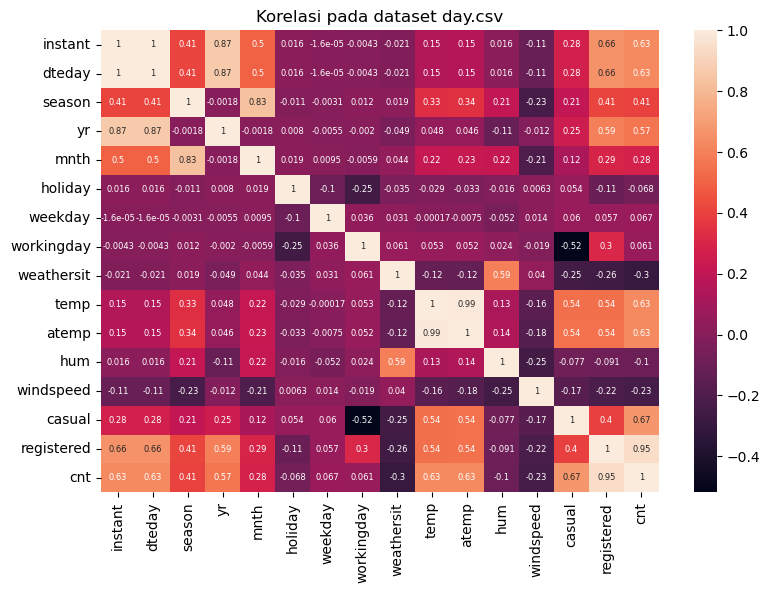

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(day_df.corr(), annot=True, annot_kws={"size": 6})
plt.title('Korelasi pada dataset day.csv')
plt.show()

**Insight:**
- Nilai korelasi ini digunakan untuk mengetahui seberapa kuat pengaruh antara 2 variabel. Biasanya digunakan untuk pemilihan fitur untuk model. Korelasi positif (0 < korelasi ≤ 1): Ketika satu variabel naik, variabel lain juga cenderung naik. Korelasi negatif (-1 ≤ korelasi < 0): Ketika satu variabel naik, variabel lain cenderung turun. Korelasi nol (0): Tidak ada hubungan linier antara dua variabel.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi jumlah penyewaan sepeda per hari (daily) dibandingkan dengan penyewaan sepeda per jam (hourly)? Apakah ada pola yang menunjukkan perbedaan signifikan antara keduanya?

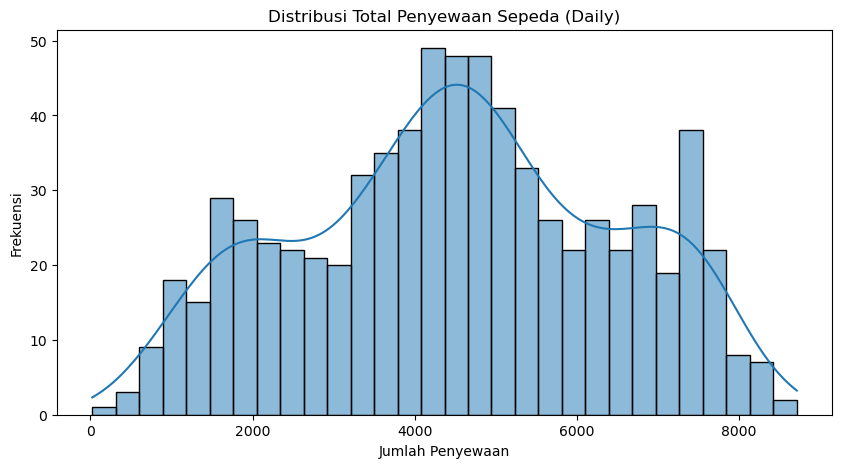

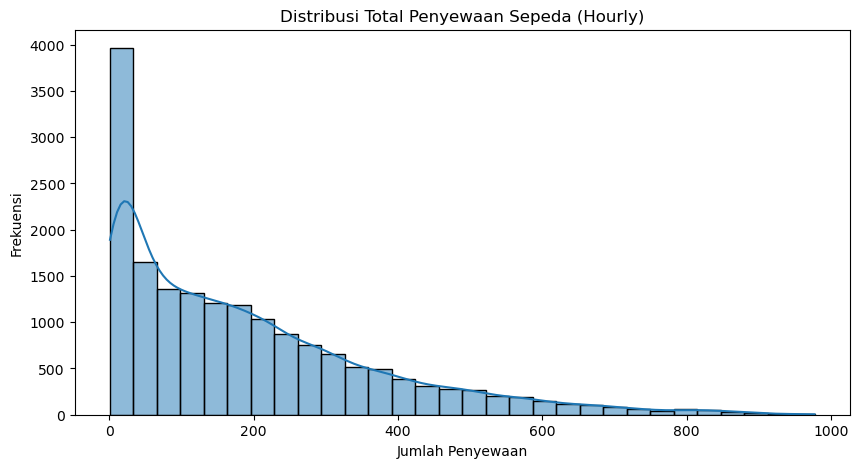

In [17]:
# Visualisasi distribusi penyewaan sepeda (cnt) di kedua dataset
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Penyewaan Sepeda (Daily)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Penyewaan Sepeda (Hourly)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

### Pertanyaan 2: Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur? Kapan penyewaan sepeda cenderung lebih tinggi?

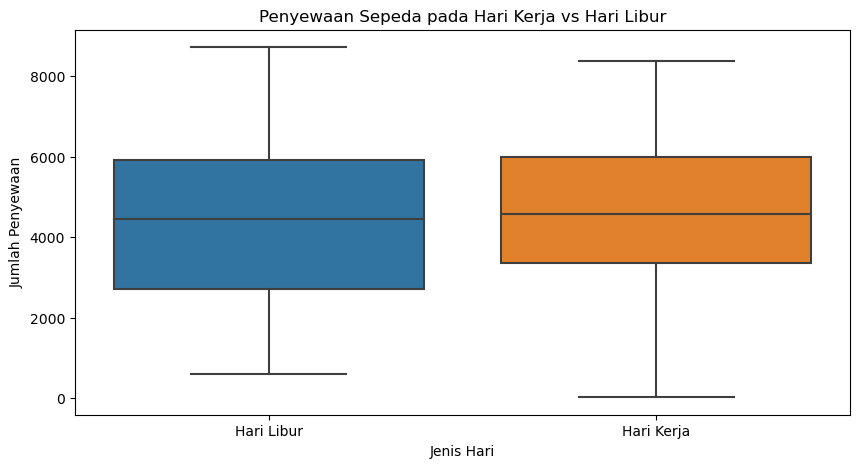

In [18]:
# Visualisasi jumlah penyewaan sepeda pada hari kerja vs hari libur
plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

### Pertanyaan 3: Bagaimana distribusi penyewaan sepeda antara pengguna kasual dan terdaftar? Apakah pengguna terdaftar lebih banyak menyewa sepeda dibandingkan pengguna kasual?

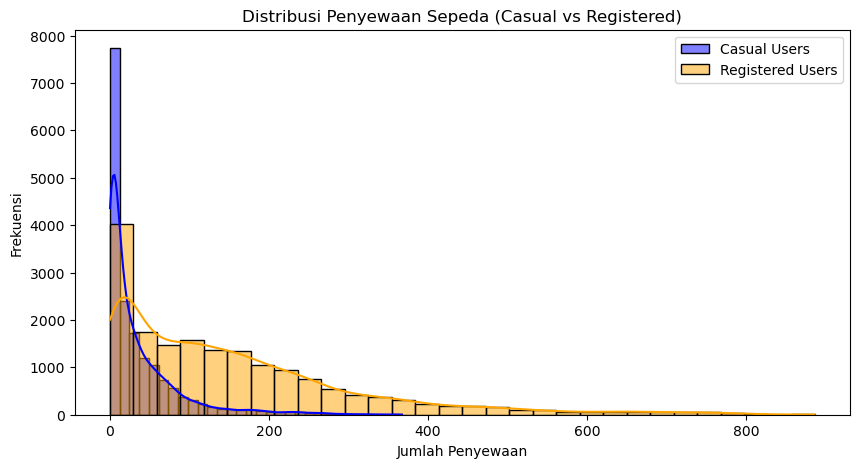

In [19]:
# Visualisasi penyewaan sepeda berdasarkan jenis pengguna (casual vs registered)
plt.figure(figsize=(10, 5))
sns.histplot(hour_df['casual'], bins=30, kde=True, color="blue", label="Casual Users")
sns.histplot(hour_df['registered'], bins=30, kde=True, color="orange", label="Registered Users")
plt.title('Distribusi Penyewaan Sepeda (Casual vs Registered)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

### Pertanyaan 4: Apakah ada perbedaan dalam tren penyewaan sepeda bulanan antara tahun 2011 dan 2012? Bulan mana yang menunjukkan penyewaan terbanyak dan apakah ada pola musiman?

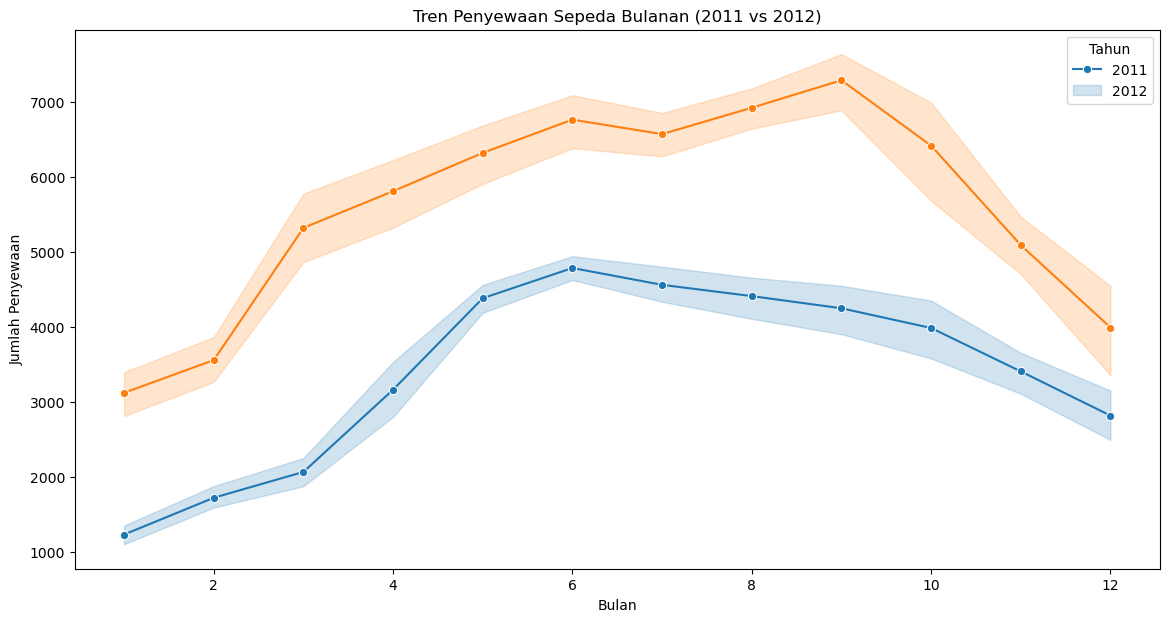

In [ ]:
# Tren Penyewaan Sepeda Bulanan
plt.figure(figsize=(14, 7))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=day_df, marker="o")
plt.title('Tren Penyewaan Sepeda Bulanan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.show()

### Pertanyaan 5: Hari apa yang menunjukkan jumlah penyewaan sepeda tertinggi dalam seminggu? Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

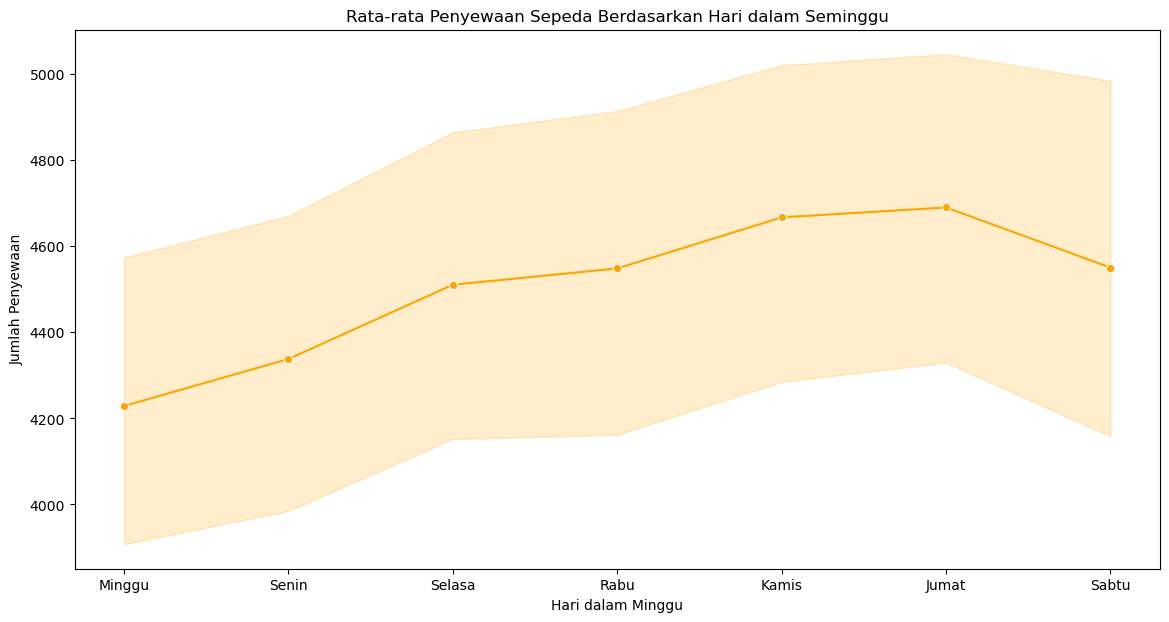

In [21]:
# Tren Penyewaan Sepeda Mingguan
plt.figure(figsize=(14, 7))
sns.lineplot(x='weekday', y='cnt', data=day_df, marker="o", color='orange')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

**Insight:**
- Distribusi total penyewaan sepeda (Daily) terbanyak pada interval 4000 sampai 4100-an penyewaan sepeda dengan frekuensi sebesar 50.
- Distribusi total penyewaan sepeda (Hourly) terbanyak pada interval 0 sampai 30-an penyewaan sepeda dengan frekuensi sebesar 4000.
- penyewaan sepeda pada hari kerja vs hari libur paling banyak terjadi pada hari libur dan paling sedikit pada hari kerja sesuai dengan box-plot yang disajikan
- distribusi penyewaan sepeda (Casual vs Registered) terjadi pada bins pertama frekuensi pada registered users sebanyak 4000 dan casual users sebanyak 8000 kurang. 
- Tren penyewaan sepeda bulanan (2011 vs 2012) paling banyak terjadi pada tahun 2012 dengan frekuensi terbanyak pada bulan ke-9 tahun 2012
- Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu terbanyak terjadi pada hari jumat.

## Conclusion

- Conclusion Pertanyaan 1: Distribusi jumlah penyewaan sepeda per hari menunjukkan bahwa sebagian besar jumlah penyewaan berkisar antara 4000 hingga 4100 penyewaan per hari dengan frekuensi tertinggi sekitar 50 kali. Sementara itu, pada penyewaan per jam, sebagian besar terjadi pada interval 0 hingga 30 penyewaan dengan frekuensi sekitar 4000 kali. Ini menunjukkan bahwa secara harian, jumlah penyewaan lebih konsisten pada kisaran tertentu, sedangkan pada tingkat per jam, ada lebih banyak fluktuasi dengan frekuensi penyewaan rendah yang lebih sering terjadi.

- Conclusion Pertanyaan 2: Penyewaan sepeda cenderung lebih tinggi pada hari libur dibandingkan hari kerja, seperti yang terlihat pada box-plot. Hal ini mungkin disebabkan oleh waktu luang yang lebih banyak pada hari libur, memungkinkan orang untuk lebih sering menyewa sepeda. Penyewaan sepeda lebih sedikit terjadi pada hari kerja, kemungkinan karena keterbatasan waktu yang disebabkan oleh kegiatan rutin seperti bekerja atau bersekolah.

- Conclusion Pertanyaan 3: Distribusi penyewaan sepeda menunjukkan bahwa pengguna terdaftar (registered) menyewa sepeda dalam jumlah yang signifikan, meskipun jumlah penyewaan terbanyak tetap pada pengguna kasual (casual) di interval pertama. Ini mungkin mengindikasikan bahwa pengguna terdaftar menyewa sepeda secara lebih konsisten, sedangkan pengguna kasual cenderung menyewa dalam jumlah yang lebih bervariasi.

- Conclusion Pertanyaan 4: Tren penyewaan sepeda bulanan menunjukkan perbedaan signifikan antara tahun 2011 dan 2012, dengan jumlah penyewaan tertinggi terjadi pada bulan ke-9 di tahun 2012. Hal ini menunjukkan adanya peningkatan jumlah penyewaan sepeda di tahun 2012 dibandingkan tahun sebelumnya, kemungkinan terkait dengan perubahan musim atau cuaca, atau peningkatan popularitas sepeda sebagai moda transportasi.

- Conclusion Pertanyaan 5: Berdasarkan hari dalam seminggu, penyewaan sepeda terbanyak terjadi pada hari Jumat. Pola ini mungkin disebabkan oleh banyaknya kegiatan sosial dan rekreasi yang dilakukan pada hari tersebut, terutama menjelang akhir pekan, sehingga mendorong lebih banyak orang untuk menyewa sepeda.